#### Nesta lição, continuaremos aprendendo a visualização exploratória de dados — aprenderemos sobre sazonalidade, gráficos de dispersão e correlação.

**DICIONÁRIO DE DADOS**

Cada linha descreve o número de aluguel de bicicletas em um único dia e o clima correspondente. Os dados abrangem um período de dois anos (1º de janeiro de 2011 – 31 de dezembro de 2012). Aqui estão algumas das colunas nas quais nos concentraremos:

- dteday: data no formato ano-mês-dia.
- temp: temperatura normalizada em Celsius (1 é o valor máximo e equivale a 41 graus Celsius).
- atemp: temperatura de sensação normalizada em Celsius (1 é o valor máximo e equivale a 50 graus Celsius).
- hum: umidade normalizada.
- windspeed: velocidade do vento normalizada.
- casual: quantidade de pessoas casuais (não cadastradas) que alugaram bicicleta naquele dia.
- registered: quantidade de cadastrados que alugaram bicicleta naquele dia (cadastrados compraram assinatura).
- cnt: total de pessoas que alugaram bicicleta (casual mais cadastradas).

In [103]:
# Bike Sharing Time Series

import pandas as pd

bike_sharing = pd.read_csv('../dataset/day.csv')

bike_sharing.head(5)
bike_sharing.tail(5)
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


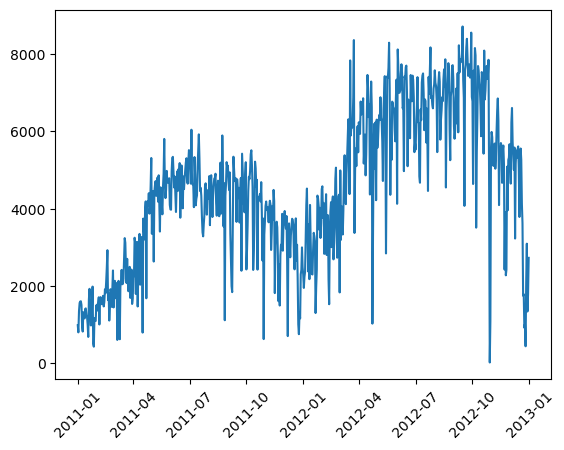

In [104]:
import matplotlib.pyplot as plt
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])
plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.xticks(rotation = 45)
plt.show()

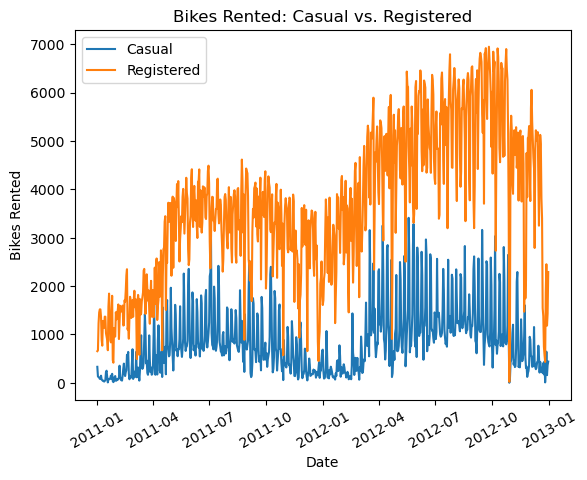

In [105]:
# Exploring Data

plt.title('Bikes Rented: Casual vs. Registered')
plt.plot(bike_sharing['dteday'], bike_sharing['casual'], label = 'Casual')
plt.plot(bike_sharing['dteday'], bike_sharing['registered'], label = 'Registered')
plt.xticks(rotation = 30)
plt.ylabel('Bikes Rented')
plt.xlabel('Date')
plt.legend()


**Análise descritiva do gráfico**

- É possível observar que existe um número maior de pessoas registradas que fizeram uso dos aluguéis em comparação com as pessoas casuais (que não possuem cadastro ativo no programa)


 - Na verdade, vemos alguns padrões semelhantes tanto para 2011 como para 2012 no que diz respeito ao número de bicicletas alugadas:

 - O número continua aumentando no intervalo janeiro-maio.
Vemos um platô no intervalo maio-setembro, onde o número de aluguéis permanece alto, mas constante (não aumenta nem diminui muito).

- O número continua diminuindo no intervalo setembro-dezembro.

- Chamamos todas essas semelhanças de tendências sazonais . 

- Em dados de séries temporais, às vezes vemos padrões específicos ocorrendo regularmente em intervalos de tempo específicos – chamamos isso de sazonalidade .

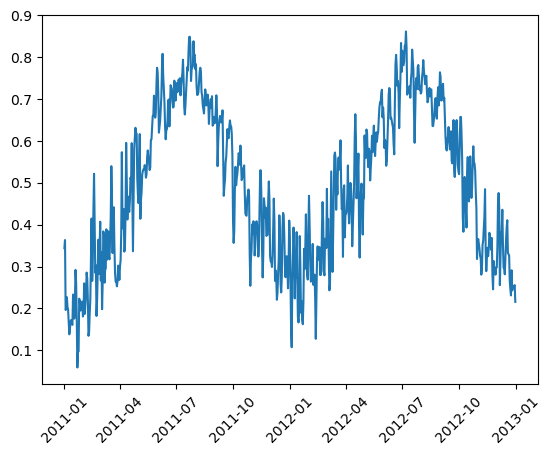

In [106]:
# Seasonal Trends / Tendências Sazonais
plt.plot(bike_sharing['dteday'], bike_sharing['temp'])
plt.xticks(rotation = 45)
plt.show()

**OBSERVANDO SAZONALIDADE**

- Podemos observar que existe uma tendência sazonal de alta e baixa nos períodos de inverno e verão.

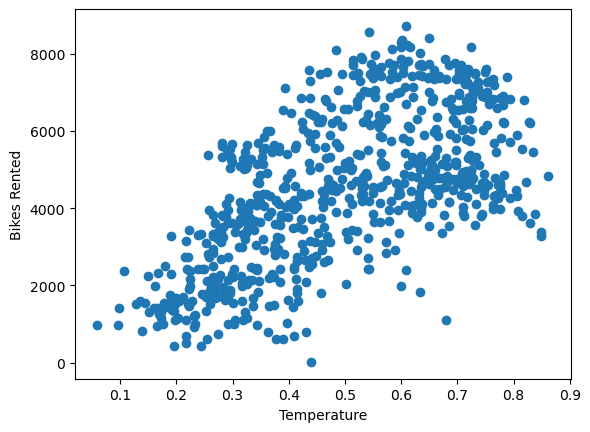

In [107]:
# Scatter Plots

plt.scatter(bike_sharing['temp'], bike_sharing['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.show()

**OBSERVANDO O GRÁFICO DE DISPERSÃO**

- Uma coisa que notamos no gráfico de dispersão acima é que a direção geral dos pontos é para cima (vista da esquerda para a direita). Isso porque à medida que a temperatura aumenta, o número de aluguel de bicicletas tende a crescer também.

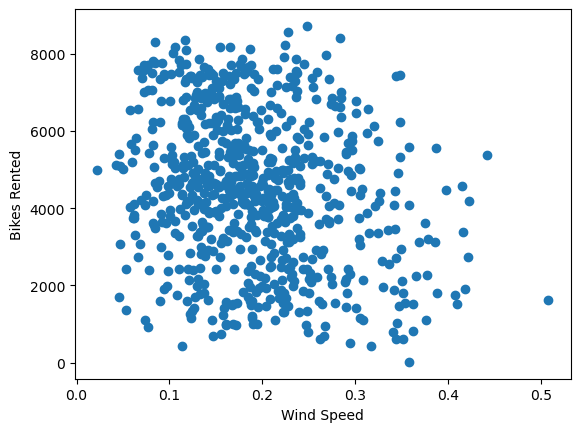

In [108]:
# Scatter Plots

plt.scatter(bike_sharing['windspeed'], bike_sharing['cnt'])
plt.xlabel('Wind Speed')
plt.ylabel('Bikes Rented')
plt.show()

**OBSERVANDO O GRÁFICO DE DISPERSÃO**

- Ao traçar o gráfico levando em consideração a velocidade do vento e a quantidade total de bicicletas alugadas, podemos observar que quanto menor a velocidade do vento maior número de aluguéis teremos.

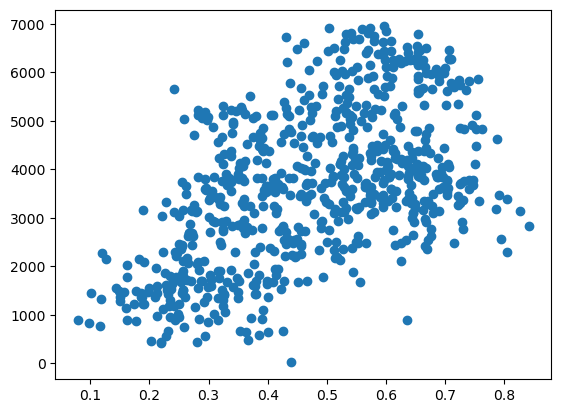

In [109]:
# Correlation
plt.scatter(bike_sharing['atemp'], bike_sharing['registered'])
correlation = 'Positive'



**Existem dois tipos de correlação: positiva e negativa.**

- Duas colunas positivamente correlacionadas tendem a mudar na mesma direção – quando uma aumenta (ou diminui), a outra tende a aumentar (ou diminuir) também. Em um gráfico de dispersão, duas colunas correlacionadas positivamente mostram uma tendência ascendente (como no gráfico temp versus cnt).

**CORRELAÇÃO POSITIVA**

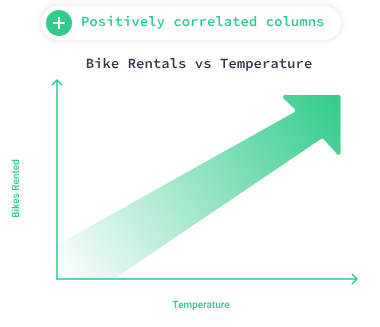

**CORRELAÇÃO NEGATIVA**

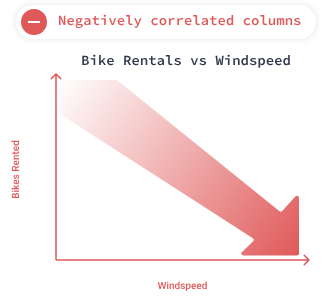

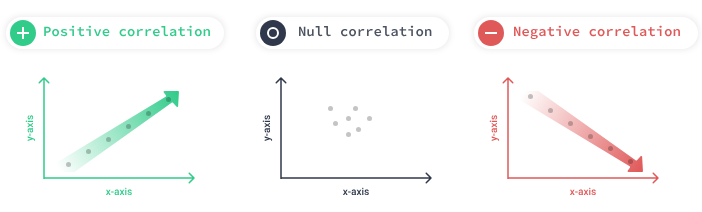

**COEFICIENTE DE PEARSON**

- Podemos medir o quão bem os pontos se ajustam a uma linha reta usando o coeficiente de correlação de Pearson – também conhecido como r de Pearson. Os valores de r de Pearson ficam entre **-1,00** e **+1,00**. 

1. Quando a correlação positiva é perfeita, o **r de Pearson é igual a +1,00**.

2. Quando a correlação negativa é perfeita, o **r de Pearson é igual a -1,00**. Um valor de 0,0 não mostra correlação


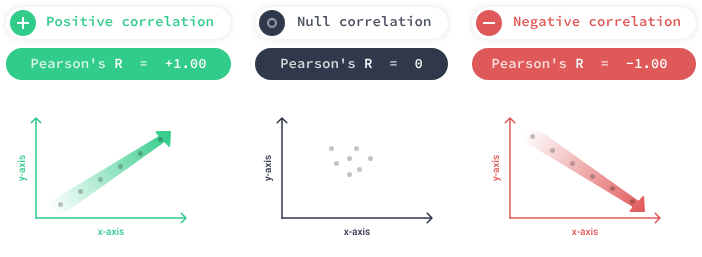

In [113]:
# Measuring Pearson's r

bike_sharing['temp'].corr(bike_sharing['cnt'])
bike_sharing['windspeed'].corr(bike_sharing['cnt'])

# Series.corr() usa uma fórmula matemática que só funciona com números. Isso significa que Series.corr()funciona apenas com colunas numéricas - se usarmos colunas de string ou data e hora, obteremos um erro.




-0.23454499742167

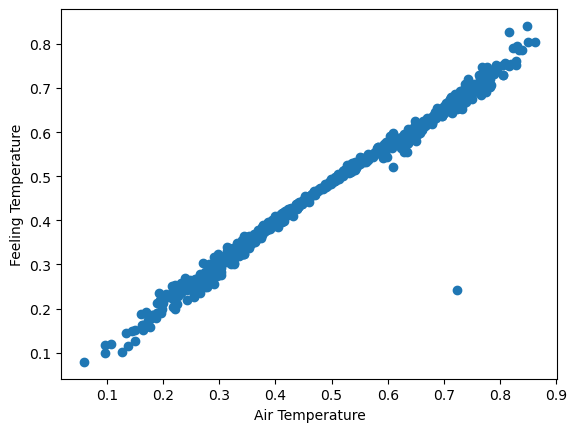

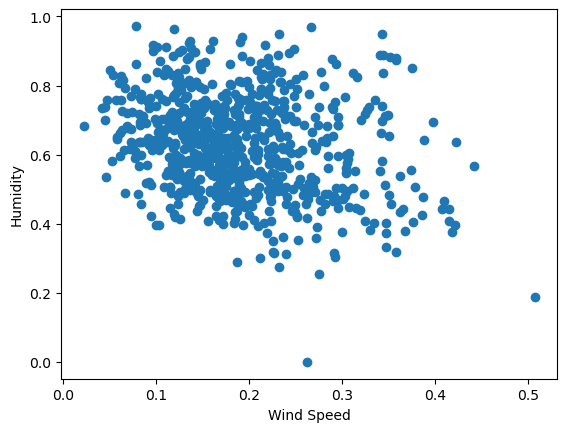

In [115]:
temp_atemp_corr = bike_sharing['temp'].corr(bike_sharing['atemp'])
wind_hum_corr = bike_sharing['windspeed'].corr(bike_sharing['hum'])

plt.scatter(bike_sharing['temp'], bike_sharing['atemp'])
plt.xlabel('Air Temperature')
plt.ylabel('Feeling Temperature')
plt.show()

plt.scatter(bike_sharing['windspeed'], bike_sharing['hum'])
plt.xlabel('Wind Speed')
plt.ylabel('Humidity')
plt.show()


In [117]:
# Categorical Columns
bike_sharing['workingday'].value_counts()

# 1 = Working Day
# 0 = Non-Working Day

bike_sharing.corr()['workingday'][['casual', 'registered']]


casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

In [119]:
bike_sharing['weathersit'].value_counts()

sentence_1 = True
sentence_2 = True
sentence_3 = False